# Preprocesamiento SECOP

* Leidy Milena Alarcón Castelblanco - lalarconc@ucentral.edu.co
* Otoniel Humberto Castañeda Rodriguez - ocastanedar1@ucentral.edu.co

In [ ]:
!pip install geopandas
!pip install pysal
!pip install prince

     |████████████████████████████████| 1.0MB 8.1MB/s 
     |████████████████████████████████| 15.3MB 252kB/s 
     |████████████████████████████████| 6.5MB 34.8MB/s 
     |████████████████████████████████| 2.4MB 8.4MB/s 
     |████████████████████████████████| 112kB 38.7MB/s 
     |████████████████████████████████| 61kB 5.9MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 92kB 7.6MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 215kB 28.6MB/s 
     |████████████████████████████████| 5.7MB 15.3MB/s 
     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 153kB 43.4MB/s 
     |████████████████████████████████| 235kB 42.4MB/s 
     |████████████████████████████████| 235kB 44.1MB/s 
     |████████████████████████████████| 57.4MB 62kB/s 
     |████████████████████████████████| 1.0MB 24.1MB/s 
     |█

In [ ]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 256kB 7.8MB/s 
     |████████████████████████████████| 10.1MB 12.8MB/s 
     |████████████████████████████████| 1.1MB 34.0MB/s 
     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 112kB 36.2MB/s 
     |████████████████████████████████| 3.1MB 34.0MB/s 
     |████████████████████████████████| 645kB 38.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 122kB 54.9MB/s 
     |████████████████████████████████| 296kB 30.7MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a721b6b092e9dac356c6ab507010578882fceecf8a693d17f1e117c5e43721c1
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=bb9676d6ef8402f6aa5acde67ae5031846e8395882eb1a6d71d21482989a29ba
  Stored in directory: /root/.cac

In [ ]:
#Importando librerías que tal vez pueda utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import geopandas as gpd
import pysal as ps
import descartes
import ipywidgets as widgets
from ipywidgets import interact, Layout
from dateutil.parser import parse
import statistics

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#/content/drive/MyDrive/3. VISUALIZACION DATOS/SECOP/SECOP_II_-_Contratos_Electr_nicos.csv
secop_df  = pd.read_csv('/content/drive/MyDrive/3. VISUALIZACION DATOS/SECOP/SECOP_II_-_Contratos_Electr_nicos.csv', low_memory=False)
secop_df.head(5)

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,Codigo de Categoria Principal,Descripcion del Proceso,Tipo de Contrato,Modalidad de Contratacion,Justificacion Modalidad de Contratacion,Fecha de Firma,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Fecha de Inicio de Ejecucion,Fecha de Fin de Ejecucion,Condiciones de Entrega,TipoDocProveedor,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Habilita Pago Adelantado,Liquidación,Obligación Ambiental,Obligaciones Postconsumo,Reversion,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Estado BPIN,Código BPIN,Anno BPIN,Saldo CDP,Saldo Vigencia,EsPostConflicto,URLProceso,Destino Gasto,Origen de los Recursos,Dias Adicionados,Puntos del Acuerdo,Pilares del Acuerdo,Nombre Representante Legal,Nacionalidad Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad
0,INSTITUTO COLOMBIANO DE ANTROPOLOGIA E HISTORIA,"830,067,892",Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Cultura,Ejecutivo,Centralizada,CO1.BDOS.1032040,CO1.PCCNTR.1265483,CO1.PCCNTR.1265483,Activo,V1.80111500,Prestación de servicios profesionales y de apo...,Prestación de servicios,Contratación directa,ServiciosProfesionales,01/10/2020,01/10/2020,04/09/2020,01/10/2020,04/09/2020,Como acordado previamente,Cédula de Ciudadanía,1019047108,BEATRIZ VANESSA VARGAS MONROY,No,No,No,No,No,No,No,"12,000,000",0,"11,999,999",1,"11,999,999",0,0,0,Válido,No Definido,N/D,"12,000,000",0,No,https://community.secop.gov.co/Public/Tenderin...,Funcionamiento,Distribuido,0,No aplica,No aplica,No Definido,No Definido,No Definido,No Definido,No Definido,0,0,0,0,0,0,01/30/2020 12:00:00 AM,701159022
1,Empresa Nacional Promotora del Desarrollo Terr...,"899,999,316",Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,Planeación,Corporación Autónoma,Centralizada,CO1.BDOS.1220223,CO1.PCCNTR.1535192,2200620,Activo,V1.80111600,PRESTAR SUS SERVICIOS PROFESIONALES POR SUS PR...,Prestación de servicios,Contratación régimen especial,Regla aplicable,04/29/2020,04/30/2020,06/30/2020,04/30/2020,06/30/2020,A convenir,Cédula de Ciudadanía,1144026834,Valentina Varela Martínez,No,No,No,No,No,No,No,"23,133,560",0,"2,400,025","23,133,560",0,0,0,"23,133,560",Válido,No Definido,2020,"23,133,560",0,No,https://community.secop.gov.co/Public/Tenderin...,Inversión,Distribuido,0,No aplica,No aplica,No Definido,No Definido,No Definido,No Definido,No Definido,0,0,0,0,0,0,03/10/2021 12:00:00 AM,700771157
2,DEFENSORÍA DEL PUEBLO,"800,186,061",Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Corporación Autónoma,Centralizada,CO1.BDOS.1891420,CO1.PCCNTR.2406798,CD-DP-231-2021,En ejecución,V1.93151519,Prestación de servicios profesionales de aboga...,Prestación de servicios,Contratación directa,ServiciosProfesionales,04/07/2021,04/13/2021,12/31/2021,NaN,NaN,No Definido,Cédula de Ciudadanía,30560617,LEYDA ESTHER LACOMBE VERGARA,No,No,No,No,No,No,No,"41,715,000",0,0,"41,715,000",0,0,0,"41,715,000",Válido,No Definido,2019,"14,475,105,000",0,No,https://community.secop.gov.co/Public/Tenderin...,Funcionamiento,Distribuido,0,No aplica,No aplica,No Definido,No Definido,No Definido,No Definido,No Definido,"41,715,000",0,0,0,0,0,04/19/2021 12:00:00 AM,702541384
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,"899,999,034",Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Nacional,Trabajo,Ejecutivo,Descentralizada,CO1.BDOS.11407

In [ ]:
secop_df.shape

(1003399, 67)

In [ ]:
secop_df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Descripcion del Proceso', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion',
       'Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Condiciones de Entrega',
       'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Val

Ajuste de tipos de datos y calidad de los mismos

In [ ]:
secop_df = secop_df[secop_df['Departamento'] != 'No Definido']
secop_df = secop_df[secop_df['Estado Contrato'] != 'Borrador']

In [ ]:
secop_df['Fecha de Firma'] = pd.to_datetime(secop_df['Fecha de Firma'], errors='coerce')
secop_df['Fecha de Inicio del Contrato'] = pd.to_datetime(secop_df['Fecha de Inicio del Contrato'], errors='coerce')
secop_df['Fecha de Fin del Contrato'] = pd.to_datetime(secop_df['Fecha de Fin del Contrato'], errors='coerce')
secop_df['Fecha de Inicio de Ejecucion'] = pd.to_datetime(secop_df['Fecha de Inicio de Ejecucion'], errors='coerce')
secop_df['Fecha de Fin de Ejecucion'] = pd.to_datetime(secop_df['Fecha de Fin de Ejecucion'], errors='coerce')
secop_df['Fecha de Fin de Ejecucion'] = pd.to_datetime(secop_df['Fecha de Fin de Ejecucion'], errors='coerce')

In [ ]:
secop_df['Año Fecha de Inicio del Contrato'] = pd.DatetimeIndex(secop_df['Fecha de Inicio del Contrato']).year
secop_df['Mes Fecha de Inicio del Contrato'] = pd.DatetimeIndex(secop_df['Fecha de Inicio del Contrato']).month
secop_df = secop_df[secop_df['Año Fecha de Inicio del Contrato'] > 2017]
secop_df = secop_df[secop_df['Año Fecha de Inicio del Contrato'] < 2022]

In [ ]:
secop_df['Valor del Contrato'] = secop_df['Valor del Contrato'].str.replace(',', '').astype(float)
secop_df['Valor de pago adelantado'] = secop_df['Valor de pago adelantado'].str.replace(',', '').astype(float)
secop_df['Valor Facturado'] = secop_df['Valor Facturado'].str.replace(',', '').astype(float)
secop_df['Valor Pendiente de Pago'] = secop_df['Valor Pendiente de Pago'].str.replace(',', '').astype(float)
secop_df['Valor Pagado'] = secop_df['Valor Pagado'].str.replace(',', '').astype(float)
secop_df['Valor Amortizado'] = secop_df['Valor Amortizado'].str.replace(',', '').astype(float)
secop_df['Valor Pendiente de Amortizacion'] = secop_df['Valor Pendiente de Amortizacion'].str.replace(',', '').astype(float)
secop_df['Valor Pendiente de Ejecucion'] = secop_df['Valor Pendiente de Ejecucion'].str.replace(',', '').astype(float)

In [ ]:
secop_df['Saldo CDP'] = secop_df['Saldo CDP'].str.replace(',', '').astype(float)
secop_df['Saldo Vigencia'] = secop_df['Saldo Vigencia'].str.replace(',', '').astype(float)

In [ ]:
secop_df['Presupuesto General de la Nacion – PGN'] = secop_df['Presupuesto General de la Nacion – PGN'].str.replace(',', '').astype(float)
secop_df['Sistema General de Participaciones'] = secop_df['Sistema General de Participaciones'].str.replace(',', '').astype(float)
secop_df['Sistema General de Regalías'] = secop_df['Sistema General de Regalías'].str.replace(',', '').astype(float)
secop_df['Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)'] = secop_df['Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)'].str.replace(',', '').astype(float)
secop_df['Recursos de Credito'] = secop_df['Recursos de Credito'].str.replace(',', '').astype(float)
secop_df['Recursos Propios'] = secop_df['Recursos Propios'].str.replace(',', '').astype(float)

In [ ]:
secop_df['Dias Adicionados'] = secop_df['Dias Adicionados'].str.replace(',', '').astype(float)

In [ ]:
secop_df.shape

(852065, 69)

Para este ejercicio seolo se estudiaran los contratos de orden territorrial

In [ ]:
##Solo se estudiaran los contratos de orden territorial
secop_territorial_df = secop_df[secop_df['Orden'] == 'Territorial'].copy()
secop_territorial_df = secop_territorial_df[secop_territorial_df['Estado Contrato'] != 'Cancelado'].copy()
secop_territorial_df = secop_territorial_df[secop_territorial_df['Estado Contrato'] != 'En aprobación'].copy()
secop_territorial_df = secop_territorial_df[secop_territorial_df['Estado Contrato'] != 'enviado Proveedor'].copy()
secop_territorial_df = secop_territorial_df[secop_territorial_df['Estado Contrato'] != 'Modificado'].copy()
secop_territorial_df = secop_territorial_df[secop_territorial_df['Estado Contrato'] != 'Suspendido'].copy()
secop_territorial_df.head(5)

,Nombre Entidad,Nit Entidad,Departamento,Ciudad,Localización,Orden,Sector,Rama,Entidad Centralizada,Proceso de Compra,ID Contrato,Referencia del Contrato,Estado Contrato,Codigo de Categoria Principal,Descripcion del Proceso,Tipo de Contrato,Modalidad de Contratacion,Justificacion Modalidad de Contratacion,Fecha de Firma,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Fecha de Inicio de Ejecucion,Fecha de Fin de Ejecucion,Condiciones de Entrega,TipoDocProveedor,Documento Proveedor,Proveedor Adjudicado,Es Grupo,Es Pyme,Habilita Pago Adelantado,Liquidación,Obligación Ambiental,Obligaciones Postconsumo,Reversion,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Estado BPIN,Código BPIN,Anno BPIN,Saldo CDP,Saldo Vigencia,EsPostConflicto,URLProceso,Destino Gasto,Origen de los Recursos,Dias Adicionados,Puntos del Acuerdo,Pilares del Acuerdo,Nombre Representante Legal,Nacionalidad Representante Legal,Tipo de Identificación Representante Legal,Identificación Representante Legal,Género Representante Legal,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Ultima Actualizacion,Codigo Entidad,Año Fecha de Inicio del Contrato,Mes Fecha de Inicio del Contrato
4,Secretaria Distrital de Integración social...,"8,999,990,611",Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Inclusión Social y Reconciliación,Ejecutivo,Centralizada,CO1.BDOS.1842902,CO1.PCCNTR.2389371,3667-2021,En ejecución,V1.80111500,PRESTACION DE LOS SERVICIOS PARA REALIZAR ACCI...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2021-03-29,2021-04-05,2021-12-04,NaT,NaT,No Definido,Cédula de Ciudadanía,1026581301,JUAN CAMILO SILVA ECHEVERRY,No,No,No,No,No,No,No,20496000.0,0.0,0.0,20496000.0,0.0,0.0,0.0,20496000.0,Válido,2020110010099,2021,2.049600e+07,0.0,No,https://community.secop.gov.co/Public/Tenderin...,Inversión,Distribuido,0.0,No aplica,No aplica,No Definido,No Definido,No Definido,No Definido,No Definido,0.0,20496000.0,0.0,0.0,0.0,0.0,04/23/2021 12:00:00 AM,702271321,2021.0,4.0
5,Secretaria Distrital de Integración social...,"8,999,990,611",Distrito Capital de Bogotá,No Definido,"Colombia, Bogotá, Bogotá",Territorial,Inclusión Social y Reconciliación,Ejecutivo,Centralizada,CO1.BDOS.530180,CO1.PCCNTR.563024,8520-2018,Activo,V1.80111500,PRESTACION DE SERVICIOS PARA DESARROLLAR ACCIO...,Prestación de servicios,Contratación directa,ServiciosProfesionales,2018-09-19,2018-09-12,2019-01-11,NaT,NaT,No Definido,Cédula de Ciudadanía,1030619341,ERICA LORENA RATIVA MEZA,No,No,No,No,No,No,No,9432000.0,0.0,0.0,9432000.0,0.0,0.0,0.0,9432000.0,Válido,No Definido,2018,1.414800e+07,0.0,No,https://community.secop.gov.co/Public/Tenderin...,Inversión,Distribuido,0.0,No aplica,No aplica,No Definido,No Definido,No Definido,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,12/27/2018 12:00:00 AM,702271321,2018.0,9.0
6,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,"9,009,585,649",Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.601331,CO1.PCCNTR.648250,13952-2018,Activo,V1.80111701,PRESTAR SERVICIOS DE APOYO A LA GESTION ASISTE...,Prestación de servicios,Contratación régimen especial,Regla aplicable,2018-11-19,2018-11-16,2018-12-31,2018-11-16,2018-12-31,A convenir,Cédula de Ciudadanía,1073680009,DAYANA GARZON BONILLA,No,No,No,No,No,No,No,1400000.0,0.0,0.0,1400000.0,0.0,0.0,0.0,1400000.0,Válido,No Definido,N/D,5.300000e+09,0.0,No,https://community.secop.gov.co/Public/Tenderin...,Funcionamiento,Distribuido,0.0,No aplica,No aplica,No Definido,No Definido,No Definido,No Definido,No Definido,0.0,0.0,0.0,0.0,0.0,0.0,04/24/2019 12:00:00 AM,702730482,2018.0,11.0
7,CENTRAL ADMINISTRATIVA Y 

In [ ]:
secop_territorial_df.shape

(263757, 69)

Análisis univariado

In [ ]:
for i in secop_territorial_df.columns:
    print('Columna:' + str(i))
    print('Tipo:' + str(secop_territorial_df[i].dtype))
    print("Nulos: " + str(secop_territorial_df[i].isna().sum()))
    print()

Columna:Nombre Entidad
Tipo:object
Nulos: 0

Columna:Nit Entidad
Tipo:object
Nulos: 0

Columna:Departamento
Tipo:object
Nulos: 0

Columna:Ciudad
Tipo:object
Nulos: 0

Columna:Localización
Tipo:object
Nulos: 0

Columna:Orden
Tipo:object
Nulos: 0

Columna:Sector
Tipo:object
Nulos: 0

Columna:Rama
Tipo:object
Nulos: 0

Columna:Entidad Centralizada
Tipo:object
Nulos: 0

Columna:Proceso de Compra
Tipo:object
Nulos: 0

Columna:ID Contrato
Tipo:object
Nulos: 0

Columna:Referencia del Contrato
Tipo:object
Nulos: 0

Columna:Estado Contrato
Tipo:object
Nulos: 0

Columna:Codigo de Categoria Principal
Tipo:object
Nulos: 0

Columna:Descripcion del Proceso
Tipo:object
Nulos: 0

Columna:Tipo de Contrato
Tipo:object
Nulos: 0

Columna:Modalidad de Contratacion
Tipo:object
Nulos: 0

Columna:Justificacion Modalidad de Contratacion
Tipo:object
Nulos: 0

Columna:Fecha de Firma
Tipo:datetime64[ns]
Nulos: 4

Columna:Fecha de Inicio del Contrato
Tipo:datetime64[ns]
Nulos: 0

Columna:Fecha de Fin del Contrato


In [ ]:
secop_territorial_df.describe()

,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Saldo CDP,Saldo Vigencia,Dias Adicionados,Presupuesto General de la Nacion – PGN,Sistema General de Participaciones,Sistema General de Regalías,"Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)",Recursos de Credito,Recursos Propios,Codigo Entidad,Año Fecha de Inicio del Contrato,Mes Fecha de Inicio del Contrato
count,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,263757.000000,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,2.637570e+05,263757.000000,263757.000000
mean,7.690128e+07,3.875833e+05,1.213080e+07,7.203098e+10,9.635881e+06,3.213231e+04,3.554510e+05,7.203322e+10,1.907034e+09,2.659697e+07,0.723939,1.425923e+06,3.589466e+06,2.040501e+06,2.485114e+07,1.258896e+05,1.197520e+07,7.024622e+08,2019.939073,5.096377
std,1.420076e+09,3.171269e+07,2.317935e+08,2.148612e+13,2.165864e+08,8.839913e+06,3.038046e+07,2.148612e+13,6.562353e+10,1.015461e+09,11.287023,1.118270e+08,1.350540e+08,1.630829e+08,3.942751e+08,1.404740e+07,8.455860e+08,1.667161e+06,0.990045,3.611629
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.369879e+09,0.000000e+00,0.000000e+00,0.000000e+00,-4.917424e+08,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000431e+08,2018.000000,1.000000
25%,8.228942e+06,0.000000e+00,0.000000e+00,4.861000e+06,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+06,9.339000e+06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.015151e+08,2019.000000,2.000000
50%,1.560000e+07,0.000000e+00,0.000000e+00,1.245332e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.442000e+07,2.509358e+07,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.022843e+08,2020.000000,4.000000
75%,3.000000e+07,0.000000e+00,3.900000e+06,2.560000e+07,0.000000e+00,0.000000e+00,0.000000e+00,2.794000e+07,1.156543e+08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.336800e+07,0.000000e+00,0.000000e+00,7.027305e+08,2021.000000,8.000000
max,3.598000e+11,8.020313e+09,4.226820e+10,7.719380e+15,4.185950e+10,4.212198e+09,8.020313e+09,7.719380e+15,6.123200e+12,1.318832e+11,1160.000000,3.163900e+10,3.999977e+10,5.456231e+10,7.235326e+10,4.589893e+09,2.210200e+11,7.129481e+08,2021.000000,12.000000


In [ ]:
for column in secop_territorial_df[['Nombre Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Tipo de Contrato',
       'Modalidad de Contratacion',
       'Condiciones de Entrega',
       'TipoDocProveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Estado BPIN', 'Código BPIN', 'Anno BPIN', 'EsPostConflicto', 'Destino Gasto',
       'Origen de los Recursos', 'Puntos del Acuerdo',
       'Pilares del Acuerdo', 'Nombre Representante Legal',
       'Nacionalidad Representante Legal',
       'Tipo de Identificación Representante Legal',
       'Género Representante Legal',
       'Codigo Entidad']].columns:
    print(secop_territorial_df[[column]].groupby(column).agg(Frecuencia_Relativa=(column, "count")) / len(secop_territorial_df[column]))
    print()

                                                    Frecuencia_Relativa
Nombre Entidad                                                         
ADMINISTRACIÓN TEMPORAL PARA EL SECTOR AGUA POT...             0.000034
AGENCIA DE EDUCACIÓN POSTSECUNDARIA DE MEDELLÍN...             0.000281
AGENCIA PARA LA INFRAESTRUCTURA DEL META                       0.000004
AGUAS DEL NORTE ANTIOQUEÑO S.A. E.S.P.                         0.000064
AGUAS Y ASEO DE YONDO S.A. E.S.P.                              0.000061
...                                                                 ...
UNIDADES TECNOLOGICAS DE SANTANDER                             0.000034
UNIVERSIDAD DISTRITAL FRANCISCO JOSE DE CALDAS                 0.000895
VALLECAUCANA DE AGUAS S.A. E.S.P                               0.000190
VEEDURIA DISTRITAL                                             0.001763
institución universitaria pascual bravo                        0.000478

[869 rows x 1 columns]

                                       

In [ ]:
secop_territorial_df.columns

Index(['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad',
       'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada',
       'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato',
       'Estado Contrato', 'Codigo de Categoria Principal',
       'Descripcion del Proceso', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion',
       'Fecha de Firma', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Condiciones de Entrega',
       'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado',
       'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Val

Selección de variables para el estudio

In [ ]:
secop_dfc = secop_territorial_df[['Departamento',
       'Localización', 'Sector',
       'ID Contrato',
       'Estado Contrato',
       'Tipo de Contrato',
       'Modalidad de Contratacion',
       'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion',
       'TipoDocProveedor',
       'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
       'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'EsPostConflicto', 'Destino Gasto',
       'Origen de los Recursos', 'Dias Adicionados',
       'Año Fecha de Inicio del Contrato',
       'Mes Fecha de Inicio del Contrato']].copy()

secop_dfc.shape

(263757, 32)

In [ ]:
secop_dfc

,Departamento,Localización,Sector,ID Contrato,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Fecha de Inicio de Ejecucion,Fecha de Fin de Ejecucion,TipoDocProveedor,Es Pyme,Habilita Pago Adelantado,Liquidación,Obligación Ambiental,Obligaciones Postconsumo,Reversion,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,EsPostConflicto,Destino Gasto,Origen de los Recursos,Dias Adicionados,Año Fecha de Inicio del Contrato,Mes Fecha de Inicio del Contrato
4,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Inclusión Social y Reconciliación,CO1.PCCNTR.2389371,En ejecución,Prestación de servicios,Contratación directa,2021-04-05,2021-12-04,NaT,NaT,Cédula de Ciudadanía,No,No,No,No,No,No,20496000.0,0.0,0.0,20496000.0,0.0,0.0,0.0,20496000.0,No,Inversión,Distribuido,0.0,2021.0,4.0
5,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Inclusión Social y Reconciliación,CO1.PCCNTR.563024,Activo,Prestación de servicios,Contratación directa,2018-09-12,2019-01-11,NaT,NaT,Cédula de Ciudadanía,No,No,No,No,No,No,9432000.0,0.0,0.0,9432000.0,0.0,0.0,0.0,9432000.0,No,Inversión,Distribuido,0.0,2018.0,9.0
6,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Salud y Protección Social,CO1.PCCNTR.648250,Activo,Prestación de servicios,Contratación régimen especial,2018-11-16,2018-12-31,2018-11-16,2018-12-31,Cédula de Ciudadanía,No,No,No,No,No,No,1400000.0,0.0,0.0,1400000.0,0.0,0.0,0.0,1400000.0,No,Funcionamiento,Distribuido,0.0,2018.0,11.0
7,Boyacá,"Colombia, Boyacá , Tunja",defensa,CO1.PCCNTR.495315,Cerrado,Compraventa,Mínima cuantía,2018-07-25,2018-11-25,2018-07-25,2018-11-25,NIT,Si,No,No,No,No,No,29876616.0,0.0,0.0,29876616.0,0.0,0.0,0.0,29876616.0,No,Funcionamiento,Distribuido,0.0,2018.0,7.0
9,Distrito Capital de Bogotá,"Colombia, Bogotá, Bogotá",Inclusión Social y Reconciliación,CO1.PCCNTR.2353332,En ejecución,Prestación de servicios,Contratación directa,2021-03-20,2022-01-19,NaT,NaT,Cédula de Ciudadanía,No,No,No,No,No,No,58680000.0,0.0,0.0,58680000.0,0.0,0.0,0.0,58680000.0,No,Inversión,Distribuido,0.0,2021.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003385,Arauca,"Colombia, Arauca , Arauca",Servicio Público,CO1.PCCNTR.1655228,Cerrado,Prestación de servicios,Contratación directa,2020-06-25,2020-08-25,NaT,NaT,Cédula de Ciudadanía,No,No,No,No,No,No,6100000.0,0.0,0.0,6100000.0,0.0,0.0,0.0,6100000.0,No,Funcionamiento,Distribuido,0.0,2020.0,6.0
1003387,Valle del Cauca,"Colombia, Valle del Cauca , Cali",Industria,CO1.PCCNTR.2178613,En ejecución,Prestación de servicios,Contratación directa,2021-01-28,2021-06-30,NaT,NaT,Cédula de Ciudadanía,No,No,No,No,No,No,21138000.0,0.0,0.0,21138000.0,0.0,0.0,0.0,21138000.0,No,Inversión,Distribuido,0.0,2021.0,1.0
1003388,Atlántico,"Colombia, Atlántico , Barranquilla",Servicio Público,CO1.PCCNTR.2142423,En ejecución,Prestación de servicios,Contratación directa,2021-01-21,2021-12-31,NaT,NaT,Cédula de Ciudadanía,No,No,No,No,No,No,57500000.0,0.0,7500000.0,57500000.0,0.0,0.0,0.0,57500000.0,No,Inversión,Distribuido,0.0,2021.0,1.0
1003390,Atlántico,"Colombia, Atlántico , Barranquilla",Servicio Público,CO1.PCCNTR.1628557,En ejecución,Prestación de servicios,Contratación directa,2020-06-24,2020-12-23,NaT,NaT,Cédula de Ciudadanía,Si,No,No,No,No,No,25260000.0,0.0,0.0,25260000.0,0.0,0.0,0.0,25260000.0,No,Inversión,Recursos Propios,0.0,2020.0,6.0


Algunos pivot para los kpi

In [ ]:
dft1 = pd.pivot_table(secop_dfc, index=["Año Fecha de Inicio del Contrato", "Departamento"], columns=["Sector"], values=["Valor del Contrato"], fill_value=0, aggfunc=np.sum)
dft1 = pd.DataFrame(dft1.to_records())
dft1


,Año Fecha de Inicio del Contrato,Departamento,"('Valor del Contrato', 'Ambiente y Desarrollo Sostenible')","('Valor del Contrato', 'Ciencia Tecnología')","('Valor del Contrato', 'Cultura')","('Valor del Contrato', 'Educación Nacional')","('Valor del Contrato', 'Hacienda y Crédito Público')","('Valor del Contrato', 'Inclusión Social y Reconciliación')","('Valor del Contrato', 'Industria')","('Valor del Contrato', 'Ley de Justicia')","('Valor del Contrato', 'Minas y Energía')","('Valor del Contrato', 'No aplica/No pertenece')","('Valor del Contrato', 'Planeación')","('Valor del Contrato', 'Presidencia de la República')","('Valor del Contrato', 'Relaciones Exteriores')","('Valor del Contrato', 'Salud y Protección Social')","('Valor del Contrato', 'Servicio Público')","('Valor del Contrato', 'Tecnologías de la Información y las Comunicaciones')","('Valor del Contrato', 'Trabajo')","('Valor del Contrato', 'Transporte')","('Valor del Contrato', 'Vivienda, Ciudad y Territorio')","('Valor del Contrato', 'agricultura')","('Valor del Contrato', 'defensa')","('Valor del Contrato', 'deportes')","('Valor del Contrato', 'interior')"
0,2018.0,Amazonas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22899800,0,0,0,0,0,0
1,2018.0,Antioquia,84490000,0,0,3855889591,0,0,0,228466931,0,1139408396,856445033515,0,0,12392000,316961533237,5728552746,0,0,0,0,2986876592,4550448279,0
2,2018.0,Atlántico,189300000,0,0,0,0,0,0,0,0,0,0,0,0,0,31573503232,0,0,0,0,0,1823503104,0,0
3,2018.0,Bolívar,230000000,0,715333500,0,0,0,0,0,0,9574265387,0,0,0,0,9008224262,0,0,33483332,0,0,0,12649283722,0
4,2018.0,Boyacá,0,0,0,0,431637601,0,0,0,0,5006291168,710352743,0,0,0,26522624104,0,0,0,0,0,9830520092,416850000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2021.0,Sucre,0,0,0,0,0,0,0,0,0,5557371582,0,0,0,8169571133,44329839983,0,0,0,0,0,427477584,0,0
119,2021.0,Tolima,0,0,0,891944897,0,0,0,156874068,0,7381690159,0,0,0,21298756968,140411762882,0,0,0,356954460,0,0,2097646667,0
120,2021.0,Valle del Cauca,18354380591,0,9582344126,88619477499,22320046884,42892271105,1912552608,613533333,0,92601644072,10098057000,0,0,27388882511,101113973477,4085719000,3690602125,11199541176,3772898044,1037300000,1437567899,27897951671,0
121,2021.0,Vaupés,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15241500,0,0,0,0,0,0


In [ ]:
dft2 = pd.pivot_table(secop_dfc, index=["Año Fecha de Inicio del Contrato", "Departamento"], columns=["Estado Contrato"], values=["Valor del Contrato"], fill_value=0, aggfunc=np.count_nonzero)
dft2 = pd.DataFrame(dft2.to_records())
dft2

,Año Fecha de Inicio del Contrato,Departamento,"('Valor del Contrato', 'Activo')","('Valor del Contrato', 'Cerrado')","('Valor del Contrato', 'En ejecución')","('Valor del Contrato', 'cedido')","('Valor del Contrato', 'terminado')"
0,2018.0,Amazonas,1,0,0,0,0
1,2018.0,Antioquia,1926,712,0,8,587
2,2018.0,Atlántico,119,0,0,0,0
3,2018.0,Bolívar,180,0,0,0,1
4,2018.0,Boyacá,342,83,0,0,14
...,...,...,...,...,...,...,...
118,2021.0,Sucre,1,0,1122,0,9
119,2021.0,Tolima,0,0,2360,6,8
120,2021.0,Valle del Cauca,2,18,11504,2,156
121,2021.0,Vaupés,0,0,1,0,0


In [ ]:
dft3 = pd.pivot_table(secop_dfc, index=["Año Fecha de Inicio del Contrato", "Departamento"], columns=["Destino Gasto"], values=["Valor del Contrato"], fill_value=0, aggfunc=np.sum)
dft3 = pd.DataFrame(dft3.to_records())
dft3

,Año Fecha de Inicio del Contrato,Departamento,"('Valor del Contrato', 'Funcionamiento')","('Valor del Contrato', 'Inversión')","('Valor del Contrato', 'No Definido')"
0,2018.0,Amazonas,22899800,0,0
1,2018.0,Antioquia,132451898024,1013127335498,46413857765
2,2018.0,Atlántico,3746600201,29671706135,168000000
3,2018.0,Bolívar,5548551363,24306332352,2355706488
4,2018.0,Boyacá,11707511948,29275339474,1935424286
...,...,...,...,...,...
118,2021.0,Sucre,33035937042,25448323240,0
119,2021.0,Tolima,44463357099,128132273002,0
120,2021.0,Valle del Cauca,74524441995,394094301126,0
121,2021.0,Vaupés,15241500,0,0


In [ ]:
dft = pd.merge(dft1, dft2, on=['Año Fecha de Inicio del Contrato', 'Departamento'])
secop_kpi_df = pd.merge(dft, dft3, on=['Año Fecha de Inicio del Contrato', 'Departamento'])
secop_kpi_df

,Año Fecha de Inicio del Contrato,Departamento,"('Valor del Contrato', 'Ambiente y Desarrollo Sostenible')","('Valor del Contrato', 'Ciencia Tecnología')","('Valor del Contrato', 'Cultura')","('Valor del Contrato', 'Educación Nacional')","('Valor del Contrato', 'Hacienda y Crédito Público')","('Valor del Contrato', 'Inclusión Social y Reconciliación')","('Valor del Contrato', 'Industria')","('Valor del Contrato', 'Ley de Justicia')","('Valor del Contrato', 'Minas y Energía')","('Valor del Contrato', 'No aplica/No pertenece')","('Valor del Contrato', 'Planeación')","('Valor del Contrato', 'Presidencia de la República')","('Valor del Contrato', 'Relaciones Exteriores')","('Valor del Contrato', 'Salud y Protección Social')","('Valor del Contrato', 'Servicio Público')","('Valor del Contrato', 'Tecnologías de la Información y las Comunicaciones')","('Valor del Contrato', 'Trabajo')","('Valor del Contrato', 'Transporte')","('Valor del Contrato', 'Vivienda, Ciudad y Territorio')","('Valor del Contrato', 'agricultura')","('Valor del Contrato', 'defensa')","('Valor del Contrato', 'deportes')","('Valor del Contrato', 'interior')","('Valor del Contrato', 'Activo')","('Valor del Contrato', 'Cerrado')","('Valor del Contrato', 'En ejecución')","('Valor del Contrato', 'cedido')","('Valor del Contrato', 'terminado')","('Valor del Contrato', 'Funcionamiento')","('Valor del Contrato', 'Inversión')","('Valor del Contrato', 'No Definido')"
0,2018.0,Amazonas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22899800,0,0,0,0,0,0,1,0,0,0,0,22899800,0,0
1,2018.0,Antioquia,84490000,0,0,3855889591,0,0,0,228466931,0,1139408396,856445033515,0,0,12392000,316961533237,5728552746,0,0,0,0,2986876592,4550448279,0,1926,712,0,8,587,132451898024,1013127335498,46413857765
2,2018.0,Atlántico,189300000,0,0,0,0,0,0,0,0,0,0,0,0,0,31573503232,0,0,0,0,0,1823503104,0,0,119,0,0,0,0,3746600201,29671706135,168000000
3,2018.0,Bolívar,230000000,0,715333500,0,0,0,0,0,0,9574265387,0,0,0,0,9008224262,0,0,33483332,0,0,0,12649283722,0,180,0,0,0,1,5548551363,24306332352,2355706488
4,2018.0,Boyacá,0,0,0,0,431637601,0,0,0,0,5006291168,710352743,0,0,0,26522624104,0,0,0,0,0,9830520092,416850000,0,342,83,0,0,14,11707511948,29275339474,1935424286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2021.0,Sucre,0,0,0,0,0,0,0,0,0,5557371582,0,0,0,8169571133,44329839983,0,0,0,0,0,427477584,0,0,1,0,1122,0,9,33035937042,25448323240,0
119,2021.0,Tolima,0,0,0,891944897,0,0,0,156874068,0,7381690159,0,0,0,21298756968,140411762882,0,0,0,356954460,0,0,2097646667,0,0,0,2360,6,8,44463357099,128132273002,0
120,2021.0,Valle del Cauca,18354380591,0,9582344126,88619477499,22320046884,42892271105,1912552608,613533333,0,92601644072,10098057000,0,0,27388882511,101113973477,4085719000,3690602125,11199541176,3772898044,1037300000,1437567899,27897951671,0,2,18,11504,2,156,74524441995,394094301126,0
121,2021.0,Vaupés,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15241500,0,0,0,0,0,0,0,0,1,0,0,15241500,0,0


In [ ]:
secop_kpi_df.columns

Index(['Año Fecha de Inicio del Contrato', 'Departamento',
       '('Valor del Contrato', 'Ambiente y Desarrollo Sostenible')',
       '('Valor del Contrato', 'Ciencia Tecnología')',
       '('Valor del Contrato', 'Cultura')',
       '('Valor del Contrato', 'Educación Nacional')',
       '('Valor del Contrato', 'Hacienda y Crédito Público')',
       '('Valor del Contrato', 'Inclusión Social y Reconciliación')',
       '('Valor del Contrato', 'Industria')',
       '('Valor del Contrato', 'Ley de Justicia')',
       '('Valor del Contrato', 'Minas y Energía')',
       '('Valor del Contrato', 'No aplica/No pertenece')',
       '('Valor del Contrato', 'Planeación')',
       '('Valor del Contrato', 'Presidencia de la República')',
       '('Valor del Contrato', 'Relaciones Exteriores')',
       '('Valor del Contrato', 'Salud y Protección Social')',
       '('Valor del Contrato', 'Servicio Público')',
       '('Valor del Contrato', 'Tecnologías de la Información y las Comunicaciones')',
     

In [ ]:
secop_kpi_df.columns = ['Año Fecha de Inicio del Contrato', 'Departamento',
       'Sector de Ambiente y Desarrollo Sostenible',
       'Sector de Ciencia Tecnología',
       'Sector de Cultura',
       'Sector de Educación Nacional',
       'Sector de Hacienda y Crédito Público',
       'Sector de Inclusión Social y Reconciliación',
       'Sector de Industria',
       'Sector de Ley de Justicia',
       'Sector de Minas y Energía',
       'Sector de No aplica/No pertenece',
       'Sector de Planeación',
       'Sector de Presidencia de la República',
       'Sector de Relaciones Exteriores',
       'Sector de Salud y Protección Social',
       'Sector de Servicio Público',
       'Sector de Tecnologías de la Información y las Comunicaciones',
       'Sector de Trabajo',
       'Sector de Transporte',
       'Sector de Vivienda, Ciudad y Territorio',
       'Sector de agricultura',
       'Sector de defensa',
       'Sector de deportes',
       'Sector de interior',
       'Estado del contrato Activo',
       'Estado del contrato Cerrado',
       'Estado del contrato En ejecución',
       'Estado del contrato cedido',
       'Estado del contrato enviado Proveedor',
       'Destino gasto Funcionamiento',
       'Destino gasto Inversión',
       'Destino gasto No Definido']

In [ ]:
departamentos_df  = pd.read_csv('/content/drive/MyDrive/3. VISUALIZACION DATOS/SECOP/deptos1.csv', low_memory=False)
departamentos_df.head(15)

,Codigo,Departamento
0,91,Amazonas
1,5,Antioquia
2,81,Arauca
3,8,Atlántico
4,13,Bolivar
5,15,Boyacá
6,23,Córdoba
7,17,Caldas
8,18,Caquetá
9,85,Casanare


In [ ]:
secop_kpi_df = pd.merge(secop_kpi_df, departamentos_df, left_on='Departamento', right_on='Departamento')
secop_kpi_df

,Año Fecha de Inicio del Contrato,Departamento,Sector de Ambiente y Desarrollo Sostenible,Sector de Ciencia Tecnología,Sector de Cultura,Sector de Educación Nacional,Sector de Hacienda y Crédito Público,Sector de Inclusión Social y Reconciliación,Sector de Industria,Sector de Ley de Justicia,Sector de Minas y Energía,Sector de No aplica/No pertenece,Sector de Planeación,Sector de Presidencia de la República,Sector de Relaciones Exteriores,Sector de Salud y Protección Social,Sector de Servicio Público,Sector de Tecnologías de la Información y las Comunicaciones,Sector de Trabajo,Sector de Transporte,"Sector de Vivienda, Ciudad y Territorio",Sector de agricultura,Sector de defensa,Sector de deportes,Sector de interior,Estado del contrato Activo,Estado del contrato Cerrado,Estado del contrato En ejecución,Estado del contrato cedido,Estado del contrato enviado Proveedor,Destino gasto Funcionamiento,Destino gasto Inversión,Destino gasto No Definido,Codigo
0,2018.0,Amazonas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22899800,0,0,0,0,0,0,1,0,0,0,0,22899800,0,0,91
1,2021.0,Amazonas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25155612,0,0,0,0,0,0,0,0,0,0,1,0,0,25155612,0,0,91
2,2018.0,Antioquia,84490000,0,0,3855889591,0,0,0,228466931,0,1139408396,856445033515,0,0,12392000,316961533237,5728552746,0,0,0,0,2986876592,4550448279,0,1926,712,0,8,587,132451898024,1013127335498,46413857765,5
3,2019.0,Antioquia,1035941865,0,0,1197672731,0,0,0,263976394,0,10733583087,447572578725,0,0,1285961740,444843327989,12635127966,0,0,485704267,0,0,5164711120,24987008,1547,601,0,3,416,64095084590,833371883288,27776605014,5
4,2020.0,Antioquia,0,0,0,250478467,0,0,0,193574659,0,1336856791,543293040907,0,0,107198511,502038800247,294251646,0,0,17603174,23771998,0,14468652783,531114924,353,137,1545,4,373,121719416327,936427272228,4408655552,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2020.0,Arauca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42347067104,0,0,0,0,0,0,0,0,0,251,370,0,38,20436433167,21552803282,357830655,81
115,2021.0,Arauca,0,0,0,0,0,0,0,0,0,0,0,0,0,1655056793,15848741541,0,0,0,0,0,0,0,0,0,70,399,0,0,8364036746,9139761588,0,81
116,2020.0,Guainía,0,0,0,0,0,0,0,0,0,16011458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,16011458,0,0,94
117,2020.0,Vaupés,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24515369,0,0,0,0,0,0,0,0,1,0,0,0,0,0,24515369,0,97


Guardamos los dataframes procesados para el dash

In [ ]:
secop_dfc.to_csv('secop_territoriales.csv', header=True, encoding="utf-8")

In [ ]:
secop_kpi_df.to_csv('secop_territoriales_kpi.csv', header=True, encoding="utf-8")

In [ ]:
secop_dfc.columns

Index(['Departamento', 'Localización', 'Sector', 'ID Contrato',
       'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
       'Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato',
       'Fecha de Inicio de Ejecucion', 'Fecha de Fin de Ejecucion',
       'TipoDocProveedor', 'Es Pyme', 'Habilita Pago Adelantado',
       'Liquidación', 'Obligación Ambiental', 'Obligaciones Postconsumo',
       'Reversion', 'Valor del Contrato', 'Valor de pago adelantado',
       'Valor Facturado', 'Valor Pendiente de Pago', 'Valor Pagado',
       'Valor Amortizado', 'Valor Pendiente de Amortizacion',
       'Valor Pendiente de Ejecucion', 'EsPostConflicto', 'Destino Gasto',
       'Origen de los Recursos', 'Dias Adicionados',
       'Año Fecha de Inicio del Contrato', 'Mes Fecha de Inicio del Contrato'],
      dtype='object')

Realizamos un análisis de correspondencias multiples para realizar el cluster

In [ ]:
import prince


df_ACM = secop_dfc.copy()


df_ACM = df_ACM[['Sector',
       'Tipo de Contrato', 'Modalidad de Contratacion',
       'TipoDocProveedor', 'Es Pyme',
       'Obligación Ambiental', 'Obligaciones Postconsumo',
       'EsPostConflicto', 'Destino Gasto',
       'Origen de los Recursos']].copy()


acm_model = prince.MCA(n_components=4)
acm_model.fit(df_ACM)
ndf_ACM = acm_model.fit_transform(df_ACM)

ndf_ACM.columns = ['c0', 'c1', 'c2', 'c3'] 
#ndf_ACM.columns = ['c0', 'c1'] 

ndf_ACM

,c0,c1,c2,c3
4,-0.383249,0.191965,0.000465,-0.090247
5,-0.383249,0.191965,0.000465,-0.090247
6,0.186489,-1.026616,0.004210,0.554898
7,2.318237,0.378668,-0.036617,-1.093246
9,-0.383249,0.191965,0.000465,-0.090247
...,...,...,...,...
1003385,-0.153918,-0.054803,0.001060,-0.006748
1003387,-0.243004,0.100519,0.009989,-0.020756
1003388,-0.287082,0.149338,0.001484,-0.064813
1003390,-0.008734,0.034982,-0.000210,0.012893


In [ ]:
acm_model.explained_inertia_


[0.038866814802412955,
 0.03085553778471541,
 0.02985926343786503,
 0.028586750916586877]

In [ ]:
acm_model.eigenvalues_

[0.2604076591761668,
 0.20673210315759324,
 0.2000570650336957,
 0.19153123114113207]

In [ ]:
np.cumsum(acm_model.explained_inertia_)




array([0.03886681, 0.06972235, 0.09958162, 0.12816837])

In [ ]:
print('Componente \t Inercia \t Suma \t\t Proporción \t Acumulada')
csum = 0
prop = 0
csprop = 0
k=0
for i in acm_model.explained_inertia_:
    csum = csum + i;
    prop = i / 0.12816854
    csprop = csprop + prop
    print(f'{k} \t\t {i:.4f} \t\t {csum:.4f} \t {prop:.4f} \t {csprop:.4f}')
    k=k+1

Componente 	 Inercia 	 Suma 		 Proporción 	 Acumulada
0 		 0.0389 		 0.0389 	 0.3032 	 0.3032
1 		 0.0309 		 0.0697 	 0.2407 	 0.5440
2 		 0.0299 		 0.0996 	 0.2330 	 0.7770
3 		 0.0286 		 0.1282 	 0.2230 	 1.0000


In [ ]:
racm = acm_model.column_coordinates(df_ACM)

racm

,0,1,2,3
Sector_Ambiente y Desarrollo Sostenible,-0.033257,0.271694,-0.008141,-0.201676
Sector_Ciencia Tecnología,-0.396681,0.622627,0.009588,0.021615
Sector_Cultura,-0.019442,0.009720,-0.003790,0.055572
Sector_Educación Nacional,-0.375503,0.340312,-0.003065,0.032813
Sector_Hacienda y Crédito Público,0.003611,0.372972,-0.008717,-0.311471
...,...,...,...,...
Destino Gasto_Funcionamiento,0.454734,-0.635119,-0.005252,0.171513
Destino Gasto_Inversión,-0.224801,0.293065,-0.003354,-0.082607
Destino Gasto_No Definido,0.907715,-0.184634,0.297739,0.229342
Origen de los Recursos_Distribuido,-0.010135,0.104712,0.000341,-0.074279


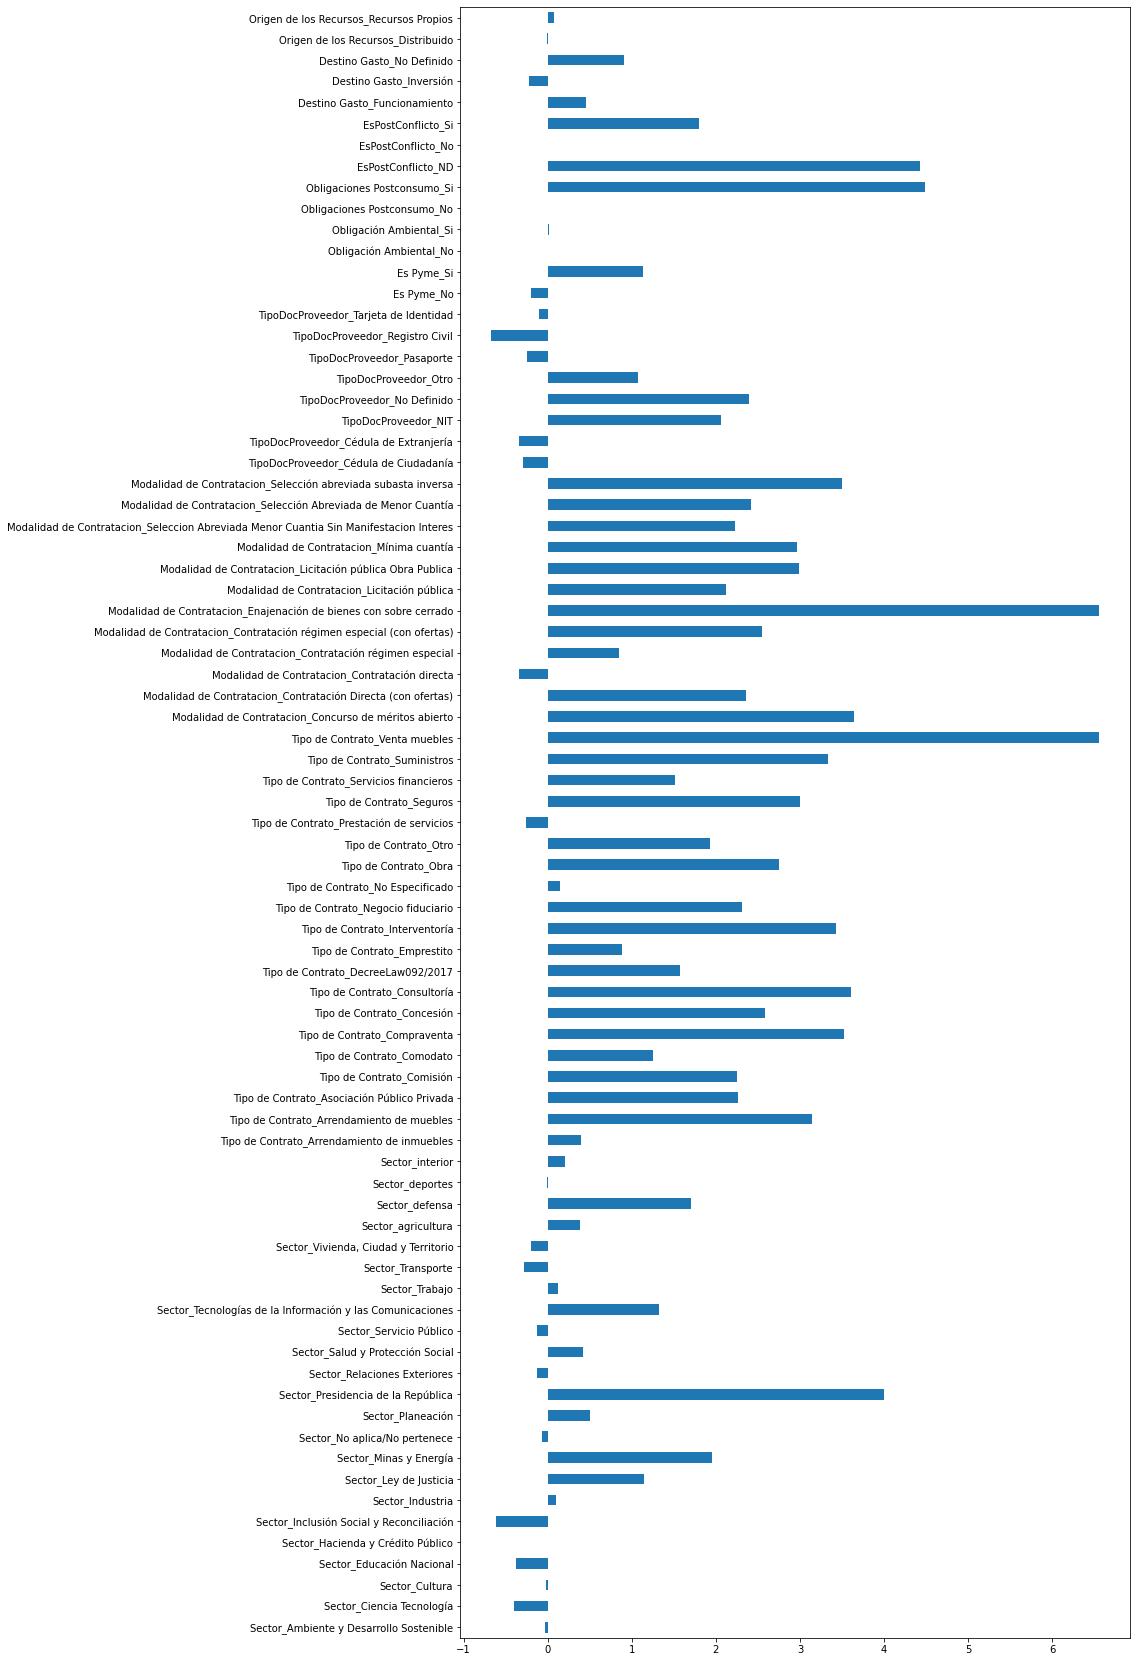

In [ ]:
racm[0].plot(kind='barh', figsize=(12,30))

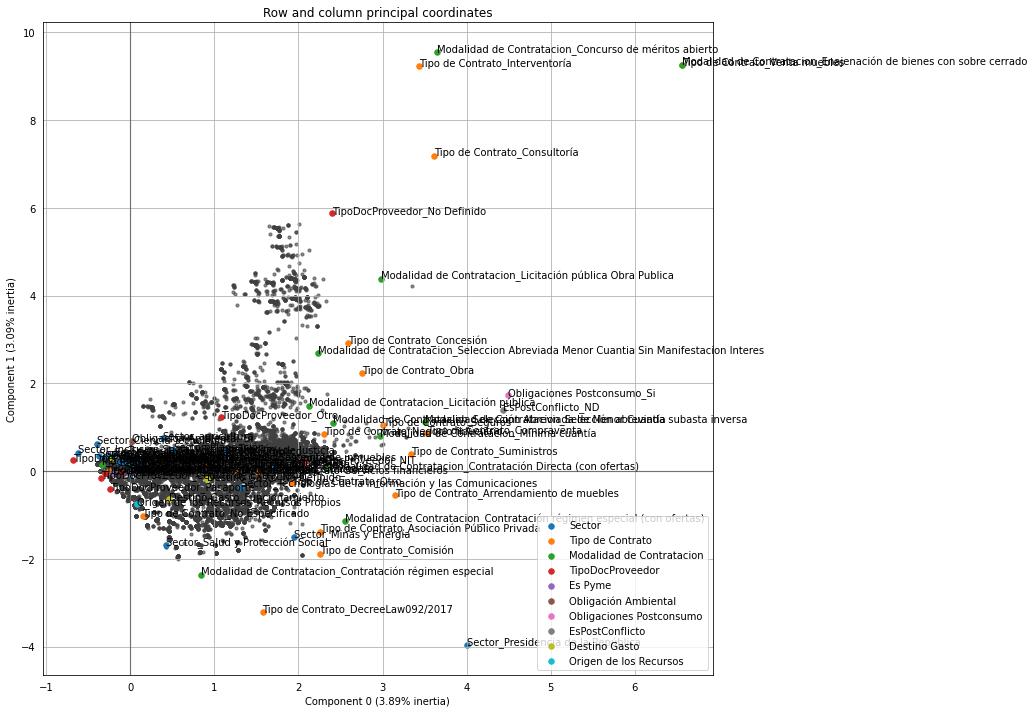

In [ ]:
acm_model.plot_coordinates(df_ACM, show_column_labels=True, figsize=(12,12))


Unimos el ACM con las variables continuas del dataframe original

In [ ]:
ndf_ACM['Fecha de Inicio del Contrato'] = secop_dfc['Fecha de Inicio del Contrato']
ndf_ACM['Fecha de Fin del Contrato'] = secop_dfc['Fecha de Fin del Contrato']
ndf_ACM['Fecha de Inicio de Ejecucion'] = secop_dfc['Fecha de Inicio de Ejecucion']
ndf_ACM['Fecha de Fin de Ejecucion'] = secop_dfc['Fecha de Fin de Ejecucion']
ndf_ACM['Valor del Contrato'] = secop_dfc['Valor del Contrato']
ndf_ACM['Valor de pago adelantado'] = secop_dfc['Valor de pago adelantado']
ndf_ACM['Valor Facturado'] = secop_dfc['Valor Facturado']
ndf_ACM['Valor Pendiente de Pago'] = secop_dfc['Valor Pendiente de Pago']
ndf_ACM['Valor Pagado'] = secop_dfc['Valor Pagado']
ndf_ACM['Valor Amortizado'] = secop_dfc['Valor Amortizado']
ndf_ACM['Valor Pendiente de Amortizacion'] = secop_dfc['Valor Pendiente de Amortizacion']
ndf_ACM['Valor Pendiente de Ejecucion'] = secop_dfc['Valor Pendiente de Ejecucion']
ndf_ACM['Dias Adicionados'] = secop_dfc['Dias Adicionados']
ndf_ACM['categoria'] = secop_dfc['Departamento']
ndf_ACM['id_contrato'] = secop_dfc['ID Contrato']


     
ndf_ACM

,c0,c1,c2,c3,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Fecha de Inicio de Ejecucion,Fecha de Fin de Ejecucion,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Dias Adicionados,categoria,id_contrato
4,-0.383249,0.191965,0.000465,-0.090247,2021-04-05,2021-12-04,NaT,NaT,20496000.0,0.0,0.0,20496000.0,0.0,0.0,0.0,20496000.0,0.0,Distrito Capital de Bogotá,CO1.PCCNTR.2389371
5,-0.383249,0.191965,0.000465,-0.090247,2018-09-12,2019-01-11,NaT,NaT,9432000.0,0.0,0.0,9432000.0,0.0,0.0,0.0,9432000.0,0.0,Distrito Capital de Bogotá,CO1.PCCNTR.563024
6,0.186489,-1.026616,0.004210,0.554898,2018-11-16,2018-12-31,2018-11-16,2018-12-31,1400000.0,0.0,0.0,1400000.0,0.0,0.0,0.0,1400000.0,0.0,Distrito Capital de Bogotá,CO1.PCCNTR.648250
7,2.318237,0.378668,-0.036617,-1.093246,2018-07-25,2018-11-25,2018-07-25,2018-11-25,29876616.0,0.0,0.0,29876616.0,0.0,0.0,0.0,29876616.0,0.0,Boyacá,CO1.PCCNTR.495315
9,-0.383249,0.191965,0.000465,-0.090247,2021-03-20,2022-01-19,NaT,NaT,58680000.0,0.0,0.0,58680000.0,0.0,0.0,0.0,58680000.0,0.0,Distrito Capital de Bogotá,CO1.PCCNTR.2353332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003385,-0.153918,-0.054803,0.001060,-0.006748,2020-06-25,2020-08-25,NaT,NaT,6100000.0,0.0,0.0,6100000.0,0.0,0.0,0.0,6100000.0,0.0,Arauca,CO1.PCCNTR.1655228
1003387,-0.243004,0.100519,0.009989,-0.020756,2021-01-28,2021-06-30,NaT,NaT,21138000.0,0.0,0.0,21138000.0,0.0,0.0,0.0,21138000.0,0.0,Valle del Cauca,CO1.PCCNTR.2178613
1003388,-0.287082,0.149338,0.001484,-0.064813,2021-01-21,2021-12-31,NaT,NaT,57500000.0,0.0,7500000.0,57500000.0,0.0,0.0,0.0,57500000.0,0.0,Atlántico,CO1.PCCNTR.2142423
1003390,-0.008734,0.034982,-0.000210,0.012893,2020-06-24,2020-12-23,NaT,NaT,25260000.0,0.0,0.0,25260000.0,0.0,0.0,0.0,25260000.0,0.0,Atlántico,CO1.PCCNTR.1628557


In [ ]:
ndf_ACM.columns

Index(['c0', 'c1', 'c2', 'c3', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
       'Fecha de Fin de Ejecucion', 'Valor del Contrato',
       'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado',
       'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion',
       'Dias Adicionados', 'categoria', 'id_contrato'],
      dtype='object')

In [ ]:
ndf_ACM.dtypes

c0                                        float64
c1                                        float64
c2                                        float64
c3                                        float64
Fecha de Inicio del Contrato       datetime64[ns]
Fecha de Fin del Contrato          datetime64[ns]
Fecha de Inicio de Ejecucion       datetime64[ns]
Fecha de Fin de Ejecucion          datetime64[ns]
Valor del Contrato                        float64
Valor de pago adelantado                  float64
Valor Facturado                           float64
Valor Pendiente de Pago                   float64
Valor Pagado                              float64
Valor Amortizado                          float64
Valor Pendiente de Amortizacion           float64
Valor Pendiente de Ejecucion              float64
Dias Adicionados                          float64
categoria                                  object
id_contrato                                object
dtype: object

Estandarizamos la variables

In [ ]:
#df_nss = ndf_ACM[['c0', 'c1', 'c2', 'c3',
#       'Valor del Contrato',
#       'Valor Pagado', 'Valor Amortizado',
#       'Dias Adicionados']].copy()

df_nss = ndf_ACM[['c0', 'c1', 'c2', 'c3',
       'Valor del Contrato',
       'Dias Adicionados']].copy()
     

In [ ]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df_nss)

df_scaled = pd.DataFrame(scaled_data, columns=df_nss.columns)
df_scaled

,c0,c1,c2,c3,Valor del Contrato,Dias Adicionados
0,-0.751024,0.422201,0.001039,-0.206211,-0.039720,-0.064139
1,-0.751024,0.422201,0.001039,-0.206211,-0.047511,-0.064139
2,0.365449,-2.257896,0.009412,1.267922,-0.053167,-0.064139
3,4.542877,0.832827,-0.081866,-2.498026,-0.033114,-0.064139
4,-0.751024,0.422201,0.001039,-0.206211,-0.012831,-0.064139
...,...,...,...,...,...,...
263752,-0.301622,-0.120532,0.002370,-0.015418,-0.049857,-0.064139
263753,-0.476197,0.221077,0.022333,-0.047426,-0.039268,-0.064139
263754,-0.562573,0.328447,0.003318,-0.148096,-0.013662,-0.064139
263755,-0.017115,0.076939,-0.000469,0.029460,-0.036365,-0.064139


Realizamos un analisis de correlaciones para descartar variables redundantes

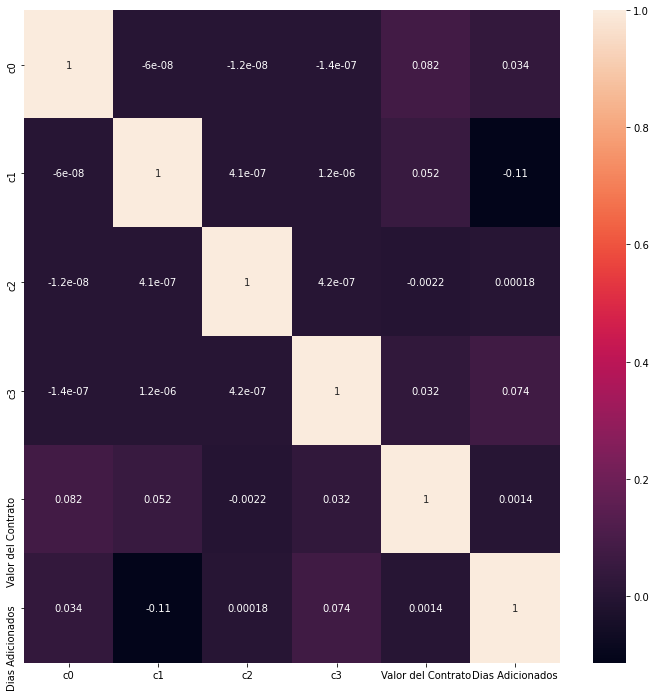

In [ ]:
correlation_mat = df_scaled.corr()
fig, ax = plt.subplots(figsize=(12,12))   
sns.heatmap(correlation_mat, annot = True, ax=ax)

plt.show()

In [ ]:
ndf_ACM = ndf_ACM.reset_index()

In [ ]:
df_scaled['id_contrato'] = ndf_ACM['id_contrato']
df_scaled['categoria'] = ndf_ACM['categoria']
df_scaled



,c0,c1,c2,c3,Valor del Contrato,Dias Adicionados,id_contrato,categoria
0,-0.751024,0.422201,0.001039,-0.206211,-0.039720,-0.064139,CO1.PCCNTR.2389371,Distrito Capital de Bogotá
1,-0.751024,0.422201,0.001039,-0.206211,-0.047511,-0.064139,CO1.PCCNTR.563024,Distrito Capital de Bogotá
2,0.365449,-2.257896,0.009412,1.267922,-0.053167,-0.064139,CO1.PCCNTR.648250,Distrito Capital de Bogotá
3,4.542877,0.832827,-0.081866,-2.498026,-0.033114,-0.064139,CO1.PCCNTR.495315,Boyacá
4,-0.751024,0.422201,0.001039,-0.206211,-0.012831,-0.064139,CO1.PCCNTR.2353332,Distrito Capital de Bogotá
...,...,...,...,...,...,...,...,...
263752,-0.301622,-0.120532,0.002370,-0.015418,-0.049857,-0.064139,CO1.PCCNTR.1655228,Arauca
263753,-0.476197,0.221077,0.022333,-0.047426,-0.039268,-0.064139,CO1.PCCNTR.2178613,Valle del Cauca
263754,-0.562573,0.328447,0.003318,-0.148096,-0.013662,-0.064139,CO1.PCCNTR.2142423,Atlántico
263755,-0.017115,0.076939,-0.000469,0.029460,-0.036365,-0.064139,CO1.PCCNTR.1628557,Atlántico


**Kmeans**

In [ ]:
dfkmeans = df_scaled.copy()#.head(1000).copy()

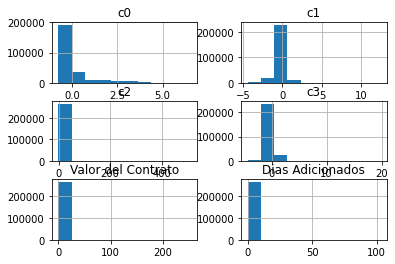

In [ ]:

dfkmeans.drop(['categoria'],1).hist()
plt.show()

In [ ]:

X = dfkmeans[['c0', 'c1', 'c2', 'c3', 'Valor del Contrato', 'Dias Adicionados']]
y = dfkmeans['categoria']
X.shape

(263757, 6)

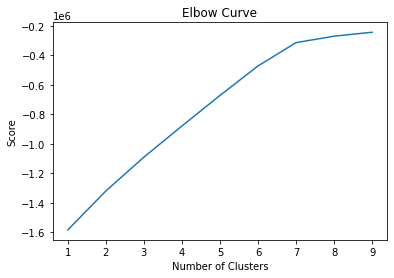

In [ ]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()



In [ ]:

kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-3.55403531e-01  1.52335131e-01  1.12432358e-03 -8.46172938e-02
  -3.24431570e-02 -5.35197861e-02]
 [ 6.56343163e+00  9.26339659e+00  5.13305844e+02  5.36249238e+00
  -5.23855179e-02 -6.41391823e-02]
 [ 6.27198894e-01 -2.20949218e+00  6.33444634e-03  1.32636230e+00
  -2.77504918e-03  1.80453499e+01]
 [ 2.75448730e+00  6.23395080e-01 -3.92720647e-02 -1.14412877e+00
   2.82238041e-01 -4.74215882e-02]
 [ 8.88820016e-01 -2.35730469e+00  1.48317900e-02  1.32422058e+00
  -1.28229276e-02  4.12030242e-02]
 [ 3.51910214e+00  8.86607297e+00 -3.56234523e-01  1.30317265e+01
   7.58589578e-01  5.64518398e-02]
 [ 2.53245122e+00  2.60851651e+00 -1.13103237e-01  1.96228660e+00
   1.41300734e+02 -6.41391823e-02]]


In [ ]:
labels = kmeans.predict(X)
dfkmeans['label_kameans'] = labels

colores=['red','green','blue', 'pink', 'brown', 'black', 'purple']
clst=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7']
asignar=[]
asignar1=[]
for row in labels:
    asignar.append(colores[row])
    asignar1.append(clst[row])

dfkmeans['clusters_kameans'] = asignar1


In [ ]:
import pickle

pkl_filename = "kmeans_secop.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(kmeans, file)

In [ ]:
with open('kmeans_secop.pkl', 'rb') as file:
    pickle_model = pickle.load(file)
    
#score = pickle_model.score(X_entreno, Y_entreno)
#print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X)
Ypredict

array([0, 0, 4, ..., 0, 0, 4], dtype=int32)

In [ ]:
pickle_model.cluster_centers_

array([[-3.55403531e-01,  1.52335131e-01,  1.12432358e-03,
        -8.46172938e-02, -3.24431570e-02, -5.35197861e-02],
       [ 6.56343163e+00,  9.26339659e+00,  5.13305844e+02,
         5.36249238e+00, -5.23855179e-02, -6.41391823e-02],
       [ 6.27198894e-01, -2.20949218e+00,  6.33444634e-03,
         1.32636230e+00, -2.77504918e-03,  1.80453499e+01],
       [ 2.75448730e+00,  6.23395080e-01, -3.92720647e-02,
        -1.14412877e+00,  2.82238041e-01, -4.74215882e-02],
       [ 8.88820016e-01, -2.35730469e+00,  1.48317900e-02,
         1.32422058e+00, -1.28229276e-02,  4.12030242e-02],
       [ 3.51910214e+00,  8.86607297e+00, -3.56234523e-01,
         1.30317265e+01,  7.58589578e-01,  5.64518398e-02],
       [ 2.53245122e+00,  2.60851651e+00, -1.13103237e-01,
         1.96228660e+00,  1.41300734e+02, -6.41391823e-02]])

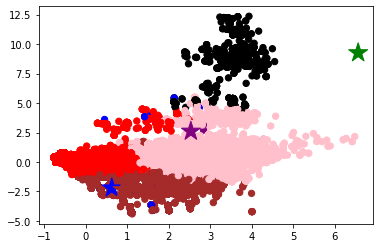

In [ ]:

f1 = dfkmeans['c0'].values
f2 = dfkmeans['c1'].values
 
plt.scatter(f1, f2, c=asignar, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=400)
plt.show()

In [ ]:
dfkmeans

,c0,c1,c2,c3,Valor del Contrato,Dias Adicionados,id_contrato,categoria,label_kameans,clusters_kameans
0,-0.751024,0.422201,0.001039,-0.206211,-0.039720,-0.064139,CO1.PCCNTR.2389371,Distrito Capital de Bogotá,0,Cluster 1
1,-0.751024,0.422201,0.001039,-0.206211,-0.047511,-0.064139,CO1.PCCNTR.563024,Distrito Capital de Bogotá,0,Cluster 1
2,0.365449,-2.257896,0.009412,1.267922,-0.053167,-0.064139,CO1.PCCNTR.648250,Distrito Capital de Bogotá,4,Cluster 5
3,4.542877,0.832827,-0.081866,-2.498026,-0.033114,-0.064139,CO1.PCCNTR.495315,Boyacá,3,Cluster 4
4,-0.751024,0.422201,0.001039,-0.206211,-0.012831,-0.064139,CO1.PCCNTR.2353332,Distrito Capital de Bogotá,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...
263752,-0.301622,-0.120532,0.002370,-0.015418,-0.049857,-0.064139,CO1.PCCNTR.1655228,Arauca,0,Cluster 1
263753,-0.476197,0.221077,0.022333,-0.047426,-0.039268,-0.064139,CO1.PCCNTR.2178613,Valle del Cauca,0,Cluster 1
263754,-0.562573,0.328447,0.003318,-0.148096,-0.013662,-0.064139,CO1.PCCNTR.2142423,Atlántico,0,Cluster 1
263755,-0.017115,0.076939,-0.000469,0.029460,-0.036365,-0.064139,CO1.PCCNTR.1628557,Atlántico,0,Cluster 1


In [ ]:
dfkmeans.to_csv('secop_clusters.csv')

In [ ]:
dfkmeans.groupby(by='clusters_kameans').count()[['label_kameans']]

,label_kameans
clusters_kameans,
Cluster 1,220089
Cluster 2,1
Cluster 3,652
Cluster 4,19984
Cluster 5,22159
Cluster 6,864
Cluster 7,8


In [ ]:
df_km_gb = dfkmeans.groupby(by=['clusters_kameans', 'categoria']).count()[['label_kameans']]
df_km_gb.reset_index(inplace=True)
df_km_gb

,clusters_kameans,categoria,label_kameans
0,Cluster 1,Amazonas,1
1,Cluster 1,Antioquia,6863
2,Cluster 1,Arauca,989
3,Cluster 1,Atlántico,8120
4,Cluster 1,Bolívar,6937
...,...,...,...
129,Cluster 6,Valle del Cauca,42
130,Cluster 7,Atlántico,1
131,Cluster 7,Bolívar,1
132,Cluster 7,Distrito Capital de Bogotá,5


In [ ]:
dep = secop_dfc['Departamento'].unique()
grp = df_km_gb['clusters_kameans'].unique()

for g in grp:
    for d in dep:
        if df_km_gb[(df_km_gb['clusters_kameans'] == g) & (df_km_gb['categoria'] == d)].empty:
            df_km_gb = df_km_gb.append({'clusters_kameans': g, 'categoria': d, 'label_kameans': 0}, ignore_index=True)


df_km_gb['label_kameans_avg'] = 0

for d in dep:
    df_km_gb.loc[df_km_gb['categoria'] == d, 'label_kameans_avg'] = df_km_gb[df_km_gb['categoria'] == d]['label_kameans'] / sum(df_km_gb[df_km_gb['categoria'] == d]['label_kameans'])
    
df_km_gb.tail(50)


,clusters_kameans,categoria,label_kameans,label_kameans_avg
181,Cluster 3,Caldas,0,0.0
182,Cluster 3,Putumayo,0,0.0
183,Cluster 3,Chocó,0,0.0
184,Cluster 3,Caquetá,0,0.0
185,Cluster 3,Sucre,0,0.0
186,Cluster 3,Huila,0,0.0
187,Cluster 3,Vichada,0,0.0
188,Cluster 3,Guaviare,0,0.0
189,Cluster 3,Vaupés,0,0.0
190,Cluster 3,Amazonas,0,0.0


In [ ]:
fig = px.bar(df_km_gb[df_km_gb['label_kameans_avg'].notnull()], x="categoria", y="label_kameans_avg", color="clusters_kameans", title="Proporción de departamentos por cluster")
fig.show()

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest


array([ 95436, 220929, 113242, 248125,  80747,  61584,  68687])

In [ ]:
contratos = []
users=dfkmeans['id_contrato'].values
for row in closest:
    contratos.append(users[row])
    print(users[row])

CO1.PCCNTR.2220184
CO1.PCCNTR.2007401
CO1.PCCNTR.1513663
CO1.PCCNTR.413707
CO1.PCCNTR.2045874
CO1.PCCNTR.1823557
CO1.PCCNTR.1928308


In [ ]:
data = {'ID Contrato':  contratos}

df = pd.DataFrame (data)

df.to_dict('records')

[{'ID Contrato': 'CO1.PCCNTR.2220184'},
 {'ID Contrato': 'CO1.PCCNTR.2007401'},
 {'ID Contrato': 'CO1.PCCNTR.1513663'},
 {'ID Contrato': 'CO1.PCCNTR.413707'},
 {'ID Contrato': 'CO1.PCCNTR.2045874'},
 {'ID Contrato': 'CO1.PCCNTR.1823557'},
 {'ID Contrato': 'CO1.PCCNTR.1928308'}]